## import necessary libraries

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [346]:
df = pd.read_csv('titanic.csv')

In [347]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

In [348]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


## Data Cleaning

### 1) check for duplicates and handle them
### 2) check for missing values and handle them
### 3) check for invalid datatypes and handle them
### 4) Remove the unwanted columns

In [350]:
df.duplicated().any() # no duplicates are exists

False

In [351]:
df.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

### age,fare - *mean/median/zero*
### embarked - *mode/unknown*
### cabin - *drop the column/unknown*

<Axes: xlabel='age'>

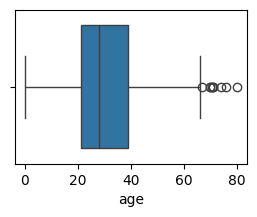

In [352]:
plt.figure(figsize=(3,2))
sns.boxplot(df,x = 'age')

<Axes: xlabel='fare'>

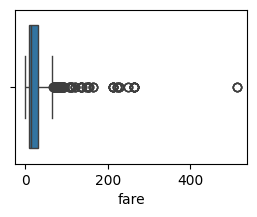

In [353]:
plt.figure(figsize=(3,2))
sns.boxplot(df,x = 'fare')

In [354]:
df.describe()
# mean --> average
# median --> middle
# mode --> most occured

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [355]:
df['age'] = df['age'].fillna(28.0) # median(50%) -- df['age'].median() ---> fillna works with series
df['fare'] = df['fare'].fillna(14.45) # median(50%) -- df['fare'].median()

In [356]:
df['embarked'].mode() # return type is series

0    S
Name: embarked, dtype: object

In [357]:
# --- IGNORE --- index
m = df['embarked'].mode()[0] # 'S'
df['embarked'] = df['embarked'].fillna(m)

In [358]:
df.info() # everything is handled except cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [359]:
# df.dropna(axis=1,inplace=True) # drop the cabin column
df = df.dropna(axis = 1)
df # return type is dataframe

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0


### there is no invaid datatype in this dataset Data Cleaning step is done

## Data Transformation (Feature Engineering)

### 1) create the new columns from an exisiting columns for data analysis
### 2) Remove the unwanted columns after feature engineering

In [360]:
df['pclass'].duplicated().sum()

1306

In [361]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0


In [362]:
df['name'].str.split(',',expand=True) # str is a helping attribute # expand automatically create list

,0,1
0,Allen,Miss. Elisabeth Walton
1,Allison,Master. Hudson Trevor
2,Allison,Miss. Helen Loraine
3,Allison,Mr. Hudson Joshua Creighton
4,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...
1304,Zabour,Miss. Hileni
1305,Zabour,Miss. Thamine
1306,Zakarian,Mr. Mapriededer
1307,Zakarian,Mr. Ortin


In [363]:
df[['lname','temp']]=df['name'].str.split(',',expand=True)
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,temp
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin


In [364]:
df['temp'].str.split('.',expand=True,n=1)

,0,1
0,Miss,Elisabeth Walton
1,Master,Hudson Trevor
2,Miss,Helen Loraine
3,Mr,Hudson Joshua Creighton
4,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...
1304,Miss,Hileni
1305,Miss,Thamine
1306,Mr,Mapriededer
1307,Mr,Ortin


In [365]:
df[['courtesy_title','fname']]=df['temp'].str.split('.',expand=True,n=1)
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,temp,courtesy_title,fname
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels)


In [366]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,temp,courtesy_title,fname
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni,Miss,Hileni
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine,Miss,Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer,Mr,Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin,Mr,Ortin


In [367]:
for col in ['age','fare']:
    # print(df[col].round(1))
    df[col]=df[col].round(1)

In [368]:
df=df.drop(columns=['name','temp'])
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname
0,1,female,29.0,0,0,24160,211.3,S,1,Allen,Miss,Elisabeth Walton
1,1,male,0.9,1,2,113781,151.6,S,1,Allison,Master,Hudson Trevor
2,1,female,2.0,1,2,113781,151.6,S,0,Allison,Miss,Helen Loraine
3,1,male,30.0,1,2,113781,151.6,S,0,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.0,1,2,113781,151.6,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5,1,0,2665,14.5,C,0,Zabour,Miss,Hileni
1305,3,female,28.0,1,0,2665,14.5,C,0,Zabour,Miss,Thamine
1306,3,male,26.5,0,0,2656,7.2,C,0,Zakarian,Mr,Mapriededer
1307,3,male,27.0,0,0,2670,7.2,C,0,Zakarian,Mr,Ortin


In [369]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'embarked',
       'survived', 'lname', 'courtesy_title', 'fname'],
      dtype='object')

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pclass          1309 non-null   int64  
 1   sex             1309 non-null   object 
 2   age             1309 non-null   float64
 3   sibsp           1309 non-null   int64  
 4   parch           1309 non-null   int64  
 5   ticket          1309 non-null   object 
 6   fare            1309 non-null   float64
 7   embarked        1309 non-null   object 
 8   survived        1309 non-null   int64  
 9   lname           1309 non-null   object 
 10  courtesy_title  1309 non-null   object 
 11  fname           1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [371]:
df.columns[[1,9,10,11]]

Index(['sex', 'lname', 'courtesy_title', 'fname'], dtype='object')

In [372]:
# for col in df.columns[[1,9,10,11]]:
#     df[col] = df[col].astype(str).str.title()

In [373]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname
0,1,female,29.0,0,0,24160,211.3,S,1,Allen,Miss,Elisabeth Walton
1,1,male,0.9,1,2,113781,151.6,S,1,Allison,Master,Hudson Trevor
2,1,female,2.0,1,2,113781,151.6,S,0,Allison,Miss,Helen Loraine
3,1,male,30.0,1,2,113781,151.6,S,0,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.0,1,2,113781,151.6,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5,1,0,2665,14.5,C,0,Zabour,Miss,Hileni
1305,3,female,28.0,1,0,2665,14.5,C,0,Zabour,Miss,Thamine
1306,3,male,26.5,0,0,2656,7.2,C,0,Zakarian,Mr,Mapriededer
1307,3,male,27.0,0,0,2670,7.2,C,0,Zakarian,Mr,Ortin


In [374]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [375]:
dict={'S':'Southampton','C':'Cherbourg','Q':'Queenstown'}

In [376]:
df['embarked']=df['embarked'].replace(dict)
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname
0,1,female,29.0,0,0,24160,211.3,Southampton,1,Allen,Miss,Elisabeth Walton
1,1,male,0.9,1,2,113781,151.6,Southampton,1,Allison,Master,Hudson Trevor
2,1,female,2.0,1,2,113781,151.6,Southampton,0,Allison,Miss,Helen Loraine
3,1,male,30.0,1,2,113781,151.6,Southampton,0,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.0,1,2,113781,151.6,Southampton,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Hileni
1305,3,female,28.0,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Thamine
1306,3,male,26.5,0,0,2656,7.2,Cherbourg,0,Zakarian,Mr,Mapriededer
1307,3,male,27.0,0,0,2670,7.2,Cherbourg,0,Zakarian,Mr,Ortin


In [377]:
df['fam_cnt']=df['sibsp']+df['parch']
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt
0,1,female,29.0,0,0,24160,211.3,Southampton,1,Allen,Miss,Elisabeth Walton,0
1,1,male,0.9,1,2,113781,151.6,Southampton,1,Allison,Master,Hudson Trevor,3
2,1,female,2.0,1,2,113781,151.6,Southampton,0,Allison,Miss,Helen Loraine,3
3,1,male,30.0,1,2,113781,151.6,Southampton,0,Allison,Mr,Hudson Joshua Creighton,3
4,1,female,25.0,1,2,113781,151.6,Southampton,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Hileni,1
1305,3,female,28.0,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Thamine,1
1306,3,male,26.5,0,0,2656,7.2,Cherbourg,0,Zakarian,Mr,Mapriededer,0
1307,3,male,27.0,0,0,2670,7.2,Cherbourg,0,Zakarian,Mr,Ortin,0


In [378]:
df=df.sort_values(by='ticket')

In [379]:
ticket_cnt_df=df['ticket'].value_counts().reset_index()
ticket_cnt_df

,ticket,count
0,CA. 2343,11
1,1601,8
2,CA 2144,8
3,3101295,7
4,347077,7
...,...,...
924,342826,1
925,343095,1
926,343120,1
927,343271,1


In [380]:
pd.merge(df,ticket_cnt_df)

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,count
0,1,female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3
1,1,female,33.0,0,0,110152,86.5,Southampton,1,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3
3,1,female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3
4,1,female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2
1306,2,male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1
1307,1,male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2


In [381]:
df=pd.merge(df,ticket_cnt_df,on='ticket',how='inner')
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,count
0,1,female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3
1,1,female,33.0,0,0,110152,86.5,Southampton,1,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3
3,1,female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3
4,1,female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2
1306,2,male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1
1307,1,male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2


In [382]:
# df.drop(['count_x', 'count_y'], axis=1, inplace=True)

In [383]:
df=df.rename(columns={'count':'psg_count'})
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_count
0,1,female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3
1,1,female,33.0,0,0,110152,86.5,Southampton,1,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3
3,1,female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3
4,1,female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2
1305,1,male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2
1306,2,male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1
1307,1,male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2


In [384]:

def comp_type(row):
    if row['psg_count'] == 1 and row['fam_cnt']== 0:
        return 'Solo'
    elif row['psg_count'] - 1 == row['fam_cnt']:
        return 'Family'
    elif row['psg_count']>1 and row['fam_cnt'] == 0:
        return 'Friends'
    elif row['psg_count']>row['fam_cnt']:
        return 'Family and Friends'
    else:
        return 'Family'
    
df['companion_type'] = df.apply(comp_type,axis=1)
df['companion_type']

0       Friends
1       Friends
2       Friends
3        Family
4        Family
         ...   
1304     Family
1305     Family
1306       Solo
1307     Family
1308     Family
Name: companion_type, Length: 1309, dtype: object

In [385]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_count,companion_type
0,1,female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3,Friends
1,1,female,33.0,0,0,110152,86.5,Southampton,1,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3,Friends
2,1,female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3,Friends
3,1,female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3,Family
4,1,female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2,Family
1305,1,male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2,Family
1306,2,male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1,Solo
1307,1,male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2,Family


In [386]:
df['companion_type'].isnull().sum() # 34

df.loc[df['companion_type'].isnull(),['courtesy_title','lname','sex','ticket','sibsp','parch','fam_cnt','psg_count']]

,courtesy_title,lname,sex,ticket,sibsp,parch,fam_cnt,psg_count


In [387]:
# df.loc[(df['fam_cnt']== 0 & df['psg_count']>1),['courtesy_title','lname','sex','ticket',
#        'sibsp','parch','fam_cnt','psg_count']].shape

In [388]:
df.loc[df['companion_type'] == 'Family and Friends']

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_count,companion_type
48,1,male,50.0,1,1,113503,211.5,Cherbourg,0,Widener,Mr,George Dunton,2,5,Family and Friends
49,1,male,27.0,0,2,113503,211.5,Cherbourg,0,Widener,Mr,Harry Elkins,2,5,Family and Friends
51,1,female,50.0,1,1,113503,211.5,Cherbourg,1,Widener,Mrs,George Dunton (Eleanor Elkins),2,5,Family and Friends
71,1,male,0.9,1,2,113781,151.6,Southampton,1,Allison,Master,Hudson Trevor,3,6,Family and Friends
72,1,female,2.0,1,2,113781,151.6,Southampton,0,Allison,Miss,Helen Loraine,3,6,Family and Friends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1,male,50.0,1,0,PC 17761,106.4,Cherbourg,0,Douglas,Mr,Walter Donald,1,3,Family and Friends
1186,1,female,48.0,1,0,PC 17761,106.4,Cherbourg,1,Douglas,Mrs,Walter Donald (Mahala Dutton),1,3,Family and Friends
1203,2,male,24.0,2,0,S.O.C. 14879,73.5,Southampton,0,Hickman,Mr,Leonard Mark,2,7,Family and Friends
1205,2,male,21.0,2,0,S.O.C. 14879,73.5,Southampton,0,Hickman,Mr,Stanley George,2,7,Family and Friends


In [389]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'embarked',
       'survived', 'lname', 'courtesy_title', 'fname', 'fam_cnt', 'psg_count',
       'companion_type'],
      dtype='object')

In [390]:
col_names=['ticket','courtesy_title','name','sex','age','pclass','fare','embarked','fam_cnt','psg_count','companion_type','survived']

In [391]:
for col in ['fname','lname','courtesy_title']:
    df[col]=df[col].str.strip()

In [392]:
df['name']=df['fname']+' '+df['lname']
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_count,companion_type,name
0,1,female,30.0,0,0,110152,86.5,Southampton,1,Cherry,Miss,Gladys,0,3,Friends,Gladys Cherry
1,1,female,33.0,0,0,110152,86.5,Southampton,1,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3,Friends,of (Lucy Noel Martha Dyer-Edwards) Rothes
2,1,female,16.0,0,0,110152,86.5,Southampton,1,Maioni,Miss,Roberta,0,3,Friends,Roberta Maioni
3,1,female,18.0,0,2,110413,79.6,Southampton,1,Taussig,Miss,Ruth,2,3,Family,Ruth Taussig
4,1,female,39.0,1,1,110413,79.6,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3,Family,Emil (Tillie Mandelbaum) Taussig
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,female,47.0,1,0,W.E.P. 5734,61.2,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2,Family,Herbert Fuller (Carrie Constance Toogood) Chaffee
1305,1,male,46.0,1,0,W.E.P. 5734,61.2,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2,Family,Herbert Fuller Chaffee
1306,2,male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1,Solo,Walter Harris
1307,1,male,70.0,1,1,WE/P 5735,71.0,Southampton,0,Crosby,Capt,Edward Gifford,2,2,Family,Edward Gifford Crosby


In [393]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'embarked',
       'survived', 'lname', 'courtesy_title', 'fname', 'fam_cnt', 'psg_count',
       'companion_type', 'name'],
      dtype='object')

In [394]:
df['fare']=(df['fare']/df['psg_count']).round(1)
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courtesy_title,fname,fam_cnt,psg_count,companion_type,name
0,1,female,30.0,0,0,110152,28.8,Southampton,1,Cherry,Miss,Gladys,0,3,Friends,Gladys Cherry
1,1,female,33.0,0,0,110152,28.8,Southampton,1,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3,Friends,of (Lucy Noel Martha Dyer-Edwards) Rothes
2,1,female,16.0,0,0,110152,28.8,Southampton,1,Maioni,Miss,Roberta,0,3,Friends,Roberta Maioni
3,1,female,18.0,0,2,110413,26.5,Southampton,1,Taussig,Miss,Ruth,2,3,Family,Ruth Taussig
4,1,female,39.0,1,1,110413,26.5,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3,Family,Emil (Tillie Mandelbaum) Taussig
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,female,47.0,1,0,W.E.P. 5734,30.6,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2,Family,Herbert Fuller (Carrie Constance Toogood) Chaffee
1305,1,male,46.0,1,0,W.E.P. 5734,30.6,Southampton,0,Chaffee,Mr,Herbert Fuller,1,2,Family,Herbert Fuller Chaffee
1306,2,male,30.0,0,0,W/C 14208,10.5,Southampton,0,Harris,Mr,Walter,0,1,Solo,Walter Harris
1307,1,male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Crosby,Capt,Edward Gifford,2,2,Family,Edward Gifford Crosby


In [395]:
df=df[col_names]

In [396]:
# Create age categories and social status
bins = [0,1,12,19,59,120]

In [397]:
labels = ['Infant','Child','Teen','Adult','Senior citizen' ]

In [398]:
df['age_category']=pd.cut(df['age'],bins= bins,labels=labels,right=False)

C:\Users\VarunAakash\AppData\Local\Temp\ipykernel_25132\1585941476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_category']=pd.cut(df['age'],bins= bins,labels=labels,right=False)


## Data Analysis

### 1) Analysis Using Pandas
### 2) Analysing using visuals (matplotlib and seaborn)

In [399]:
# Pandas Analysis
# 1. Basic Statistics
df.describe()

,age,pclass,fare,fam_cnt,psg_count,survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.503209,2.294882,14.758365,0.883881,2.101604,0.381971
std,12.905189,0.837836,13.552219,1.583639,1.779832,0.486055
min,0.200000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,22.000000,2.000000,7.600000,0.000000,1.000000,0.000000
50%,28.000000,3.000000,8.100000,0.000000,1.000000,0.000000
75%,35.000000,3.000000,15.000000,1.000000,3.000000,1.000000
max,80.000000,3.000000,128.100000,10.000000,11.000000,1.000000


In [400]:
df['courtesy_title'].unique()

array(['Miss', 'the Countess', 'Mrs', 'Mr', 'Dr', 'Major', 'Master',
       'Col', 'Lady', 'Jonkheer', 'Rev', 'Ms', 'Mlle', 'Mme', 'Sir',
       'Don', 'Dona', 'Capt'], dtype=object)

In [401]:
def social_status(row):
    if row['courtesy_title'] in ['Mr','Ms', 'Mrs','Master', 'Miss', 'Rev','Mlle']:
        return 'Comman'
    elif row['courtesy_title'] in ['Sir','Lady','Jonkheer','The Countess','Don',' Dona']:
        return 'Royal'
    elif row['courtesy_title'] in ['Col','Major','Capt']:
        return 'Militery'
    else:
        return 'Other Professional'

df['social_status'] = df.apply(social_status, axis=1)

C:\Users\VarunAakash\AppData\Local\Temp\ipykernel_25132\214318639.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['social_status'] = df.apply(social_status, axis=1)


In [402]:
# Final column selection after all transformations
final_col_names=['ticket','courtesy_title','name','sex','age','age_category','pclass','fare','embarked','fam_cnt','psg_count','companion_type','social_status','survived']
df = df[final_col_names]

In [403]:
# Verify final dataframe
df

,ticket,courtesy_title,name,sex,age,age_category,pclass,fare,embarked,fam_cnt,psg_count,companion_type,social_status,survived
0,110152,Miss,Gladys Cherry,female,30.0,Adult,1,28.8,Southampton,0,3,Friends,Comman,1
1,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards) Rothes,female,33.0,Adult,1,28.8,Southampton,0,3,Friends,Other Professional,1
2,110152,Miss,Roberta Maioni,female,16.0,Teen,1,28.8,Southampton,0,3,Friends,Comman,1
3,110413,Miss,Ruth Taussig,female,18.0,Teen,1,26.5,Southampton,2,3,Family,Comman,1
4,110413,Mrs,Emil (Tillie Mandelbaum) Taussig,female,39.0,Adult,1,26.5,Southampton,2,3,Family,Comman,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood) Chaffee,female,47.0,Adult,1,30.6,Southampton,1,2,Family,Comman,1
1305,W.E.P. 5734,Mr,Herbert Fuller Chaffee,male,46.0,Adult,1,30.6,Southampton,1,2,Family,Comman,0
1306,W/C 14208,Mr,Walter Harris,male,30.0,Adult,2,10.5,Southampton,0,1,Solo,Comman,0
1307,WE/P 5735,Capt,Edward Gifford Crosby,male,70.0,Senior citizen,1,35.5,Southampton,2,2,Family,Militery,0


In [404]:
df

,ticket,courtesy_title,name,sex,age,age_category,pclass,fare,embarked,fam_cnt,psg_count,companion_type,social_status,survived
0,110152,Miss,Gladys Cherry,female,30.0,Adult,1,28.8,Southampton,0,3,Friends,Comman,1
1,110152,the Countess,of (Lucy Noel Martha Dyer-Edwards) Rothes,female,33.0,Adult,1,28.8,Southampton,0,3,Friends,Other Professional,1
2,110152,Miss,Roberta Maioni,female,16.0,Teen,1,28.8,Southampton,0,3,Friends,Comman,1
3,110413,Miss,Ruth Taussig,female,18.0,Teen,1,26.5,Southampton,2,3,Family,Comman,1
4,110413,Mrs,Emil (Tillie Mandelbaum) Taussig,female,39.0,Adult,1,26.5,Southampton,2,3,Family,Comman,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,W.E.P. 5734,Mrs,Herbert Fuller (Carrie Constance Toogood) Chaffee,female,47.0,Adult,1,30.6,Southampton,1,2,Family,Comman,1
1305,W.E.P. 5734,Mr,Herbert Fuller Chaffee,male,46.0,Adult,1,30.6,Southampton,1,2,Family,Comman,0
1306,W/C 14208,Mr,Walter Harris,male,30.0,Adult,2,10.5,Southampton,0,1,Solo,Comman,0
1307,WE/P 5735,Capt,Edward Gifford Crosby,male,70.0,Senior citizen,1,35.5,Southampton,2,2,Family,Militery,0


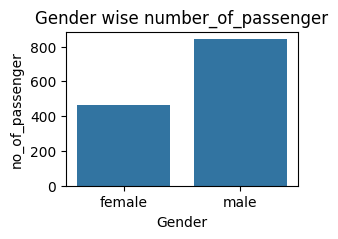

In [405]:
plt.figure(figsize=(3,2))  # (w,h)
sns.countplot(x='sex', data=df)  # corrected seaborn countplot function
plt.title("Gender wise number_of_passenger")
plt.xlabel('Gender')  # to change the name of axis
plt.ylabel("no_of_passenger")  # to change the name of y axis
plt.show()  # it should be in last always


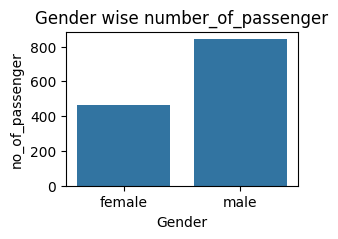

In [406]:
plt.figure(figsize=(3,2)) # (w,h)
sns.countplot(df,x ='sex')  # seborn only to plot the graph,no custamisation can't done in sea born
                            # for customisation go foe matplotlib
plt.title("Gender wise number_of_passenger")
plt.xlabel('Gender')  # to change the name of axis
plt.ylabel("no_of_passenger") # to change the name of y axis
plt.show() # it should be in last always

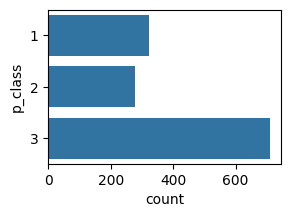

In [407]:
plt.figure(figsize=(3,2)) # to reduce the size
sns.countplot(df,y ='pclass') # seaborn only to plot the graph,no custamisation can't done in sea born
plt.xlabel('count')  # to change the name of axis
plt.ylabel("p_class") # to change the name of y axis


plt.show()

Text(0, 0.5, 'p_class')

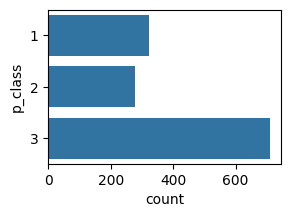

In [408]:
plt.figure(figsize=(3,2)) # to reduce the size
sns.countplot(df,y ='pclass') # seaborn only to plot the graph,no custamisation can't done in sea born
plt.xlabel('count')  # to change the name of axis
plt.ylabel("p_class") # to change the name of y axis


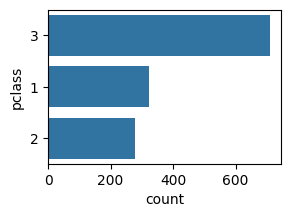

In [409]:
o =df['pclass'].value_counts().index
plt.figure(figsize=(3,2)) # to reduce the size
sns.countplot(df,y ='pclass',order = o)
plt.show()

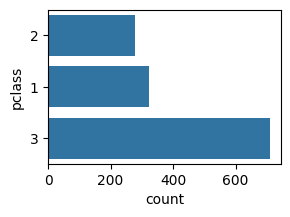

In [410]:
plt.figure(figsize=(3,2)) # to reduce the size
sns.countplot(df,y ='pclass',order = [2,1,3])
plt.show()

In [411]:
# Survival Rate Analysis
print("=== SURVIVAL ANALYSIS ===")
print(f"Total Passengers: {len(df)}")
print(f"\nSurvival Distribution:")
print(df['survived'].value_counts())
print(f"\nSurvival Rate: {(df['survived'].sum() / len(df) * 100):.2f}%")

# Gender-wise Survival
print(f"\n=== GENDER-WISE SURVIVAL ===")
gender_survival = df.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
gender_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(gender_survival)

# Class-wise Survival
print(f"\n=== CLASS-WISE SURVIVAL ===")
class_survival = df.groupby('pclass')['survived'].agg(['count', 'sum', 'mean'])
class_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(class_survival)

# Age Category Survival
print(f"\n=== AGE CATEGORY SURVIVAL ===")
age_survival = df.groupby('age_category')['survived'].agg(['count', 'sum', 'mean'])
age_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(age_survival)

=== SURVIVAL ANALYSIS ===
Total Passengers: 1309

Survival Distribution:
survived
0    809
1    500
Name: count, dtype: int64

Survival Rate: 38.20%

=== GENDER-WISE SURVIVAL ===
        Total  Survived  Survival_Rate
sex                                   
female    466       339       0.727468
male      843       161       0.190985

=== CLASS-WISE SURVIVAL ===
        Total  Survived  Survival_Rate
pclass                                
1         323       200       0.619195
2         277       119       0.429603
3         709       181       0.255289

=== AGE CATEGORY SURVIVAL ===
                Total  Survived  Survival_Rate
age_category                                  
Infant             12        10       0.833333
Child              79        41       0.518987
Teen              105        44       0.419048
Adult            1070       392       0.366355
Senior citizen     43        13       0.302326


C:\Users\VarunAakash\AppData\Local\Temp\ipykernel_25132\2443591395.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('age_category')['survived'].agg(['count', 'sum', 'mean'])


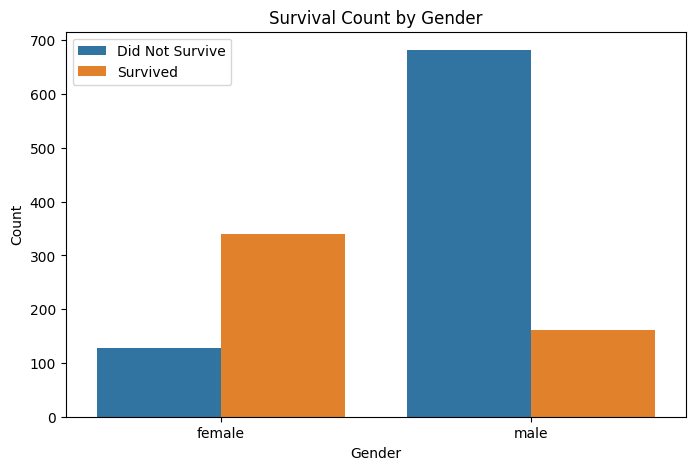

In [412]:
# Survival vs Gender
plt.figure(figsize=(8, 5))
sns.countplot(df, x='sex', hue='survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

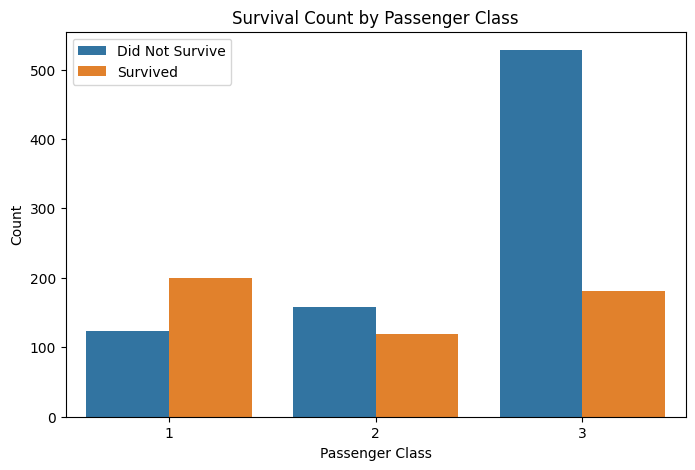

In [413]:
# Survival vs Passenger Class
plt.figure(figsize=(8, 5))
sns.countplot(df, x='pclass', hue='survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

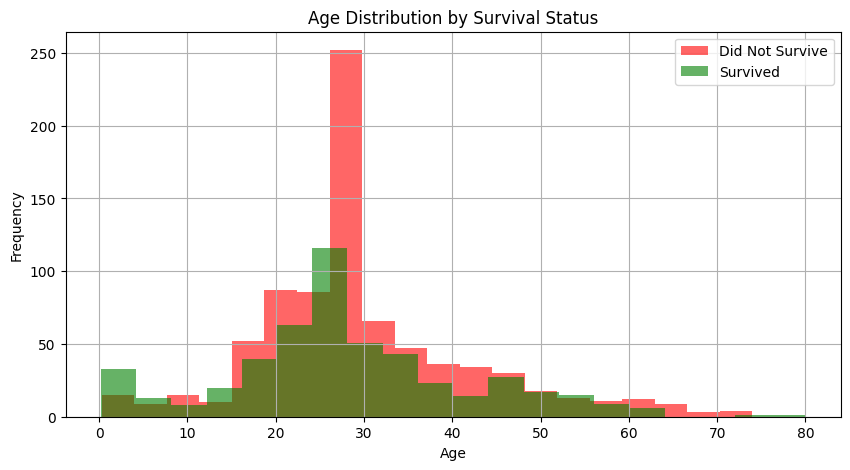

In [414]:
# Age Distribution by Survival
plt.figure(figsize=(10, 5))
df[df['survived'] == 0]['age'].hist(bins=20, alpha=0.6, label='Did Not Survive', color='red')
df[df['survived'] == 1]['age'].hist(bins=20, alpha=0.6, label='Survived', color='green')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

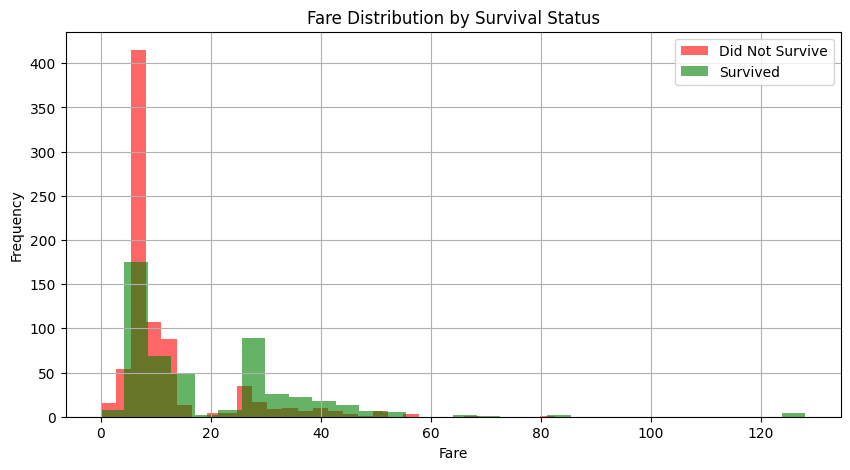

In [415]:
# Fare Distribution by Survival
plt.figure(figsize=(10, 5))
df[df['survived'] == 0]['fare'].hist(bins=30, alpha=0.6, label='Did Not Survive', color='red')
df[df['survived'] == 1]['fare'].hist(bins=30, alpha=0.6, label='Survived', color='green')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

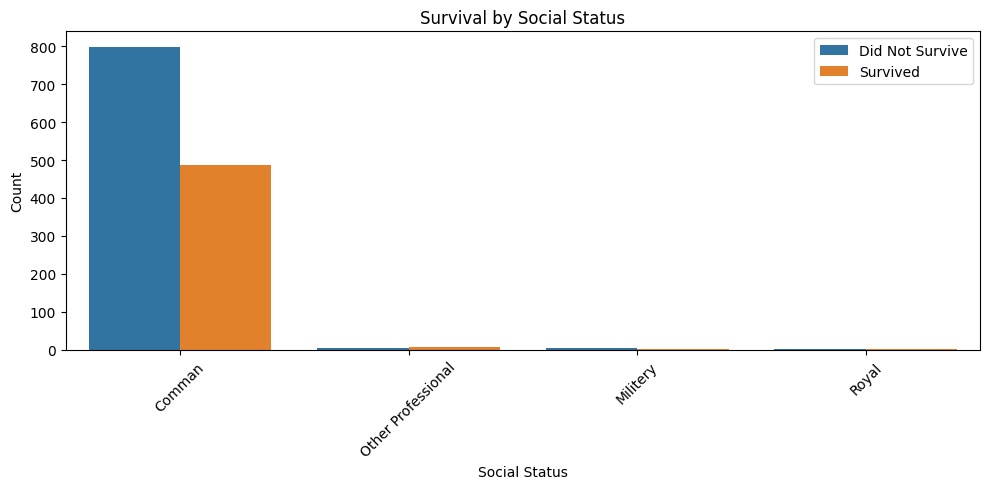

In [416]:
# Social Status vs Survival
plt.figure(figsize=(10, 5))
sns.countplot(df, x='social_status', hue='survived')
plt.title('Survival by Social Status')
plt.xlabel('Social Status')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

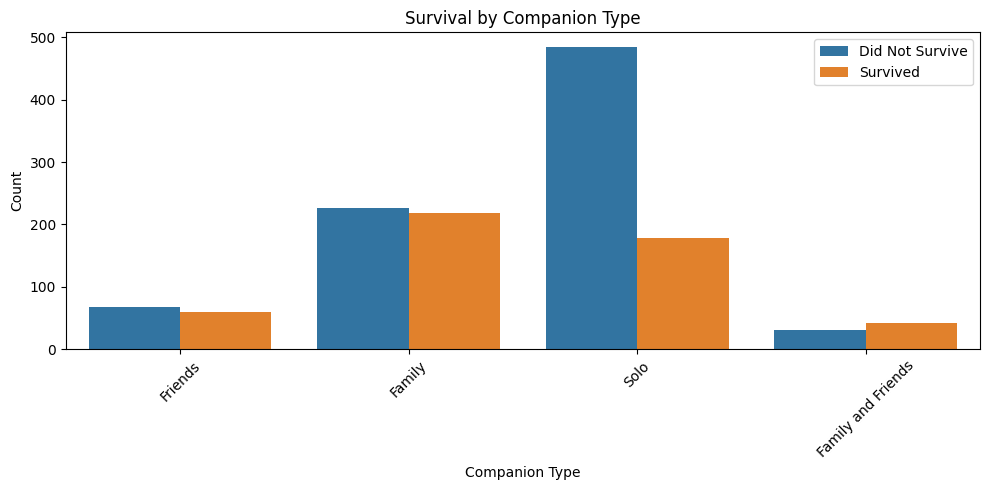

In [417]:
# Companion Type vs Survival
plt.figure(figsize=(10, 5))
sns.countplot(df, x='companion_type', hue='survived')
plt.title('Survival by Companion Type')
plt.xlabel('Companion Type')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

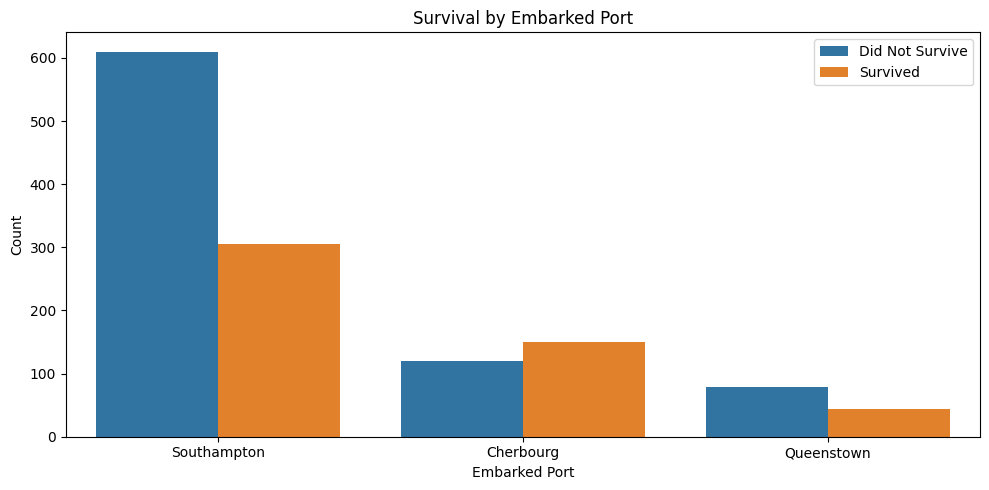

In [418]:
# Embarked Port vs Survival
plt.figure(figsize=(10, 5))
sns.countplot(df, x='embarked', hue='survived')
plt.title('Survival by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.tight_layout()
plt.show()

## conclusion

In [419]:
# Key Insights Summary
print("="*60)
print("TITANIC SURVIVAL ANALYSIS - KEY FINDINGS")
print("="*60)
print("\n1. OVERALL SURVIVAL RATE: 38.20% (500 out of 1309 passengers)")
print("\n2. GENDER IMPACT (Most Significant):")
print("   - Female Survival Rate: 72.75% (339/466)")
print("   - Male Survival Rate: 19.10% (161/843)")
print("   - Evidence of 'Women and Children First' policy")

print("\n3. PASSENGER CLASS IMPACT:")
print("   - 1st Class: 61.92% survival rate (200/323)")
print("   - 2nd Class: 42.96% survival rate (119/277)")
print("   - 3rd Class: 25.53% survival rate (181/709)")
print("   - Higher class = Better survival chances")

print("\n4. AGE IMPACT:")
print("   - Infants: 83.33% survival (10/12) - Highest")
print("   - Children: 51.90% survival (41/79)")
print("   - Teenagers: 41.90% survival (44/105)")
print("   - Adults: 36.64% survival (392/1070)")
print("   - Seniors: 30.23% survival (13/43) - Lowest")

print("\n5. COMPANION TYPE IMPACT:")
print("   - Family: 50% survival (balanced)")
print("   - Family & Friends: 64.28% survival (9/14)")
print("   - Friends: 52.08% survival (62/119)")
print("   - Solo: 35.48% survival (239/673)")

print("\n6. EMBARKED PORT IMPACT:")
print("   - Cherbourg: 57.14% survival (145/254)")
print("   - Queenstown: 35.51% survival (47/132)")
print("   - Southampton: 33.15% survival (308/929)")

print("\n" + "="*60)
print("CONCLUSION:")
print("="*60)
print("""
The Titanic disaster analysis reveals several key factors affecting 
survival:

1. GENDER was the strongest predictor - women had significantly 
   higher survival rates (72.75% vs 19.10% for men)

2. SOCIAL CLASS strongly influenced survival - first-class passengers 
   had much better survival rates than third-class

3. AGE mattered - younger passengers, especially children and infants, 
   had higher survival rates

4. HAVING FAMILY/COMPANIONS slightly improved survival chances, likely 
   due to mutual assistance

5. EMBARKED PORT showed variation, possibly due to cabin location 
   or passenger composition differences
""")

TITANIC SURVIVAL ANALYSIS - KEY FINDINGS

1. OVERALL SURVIVAL RATE: 38.20% (500 out of 1309 passengers)

2. GENDER IMPACT (Most Significant):
   - Female Survival Rate: 72.75% (339/466)
   - Male Survival Rate: 19.10% (161/843)
   - Evidence of 'Women and Children First' policy

3. PASSENGER CLASS IMPACT:
   - 1st Class: 61.92% survival rate (200/323)
   - 2nd Class: 42.96% survival rate (119/277)
   - 3rd Class: 25.53% survival rate (181/709)
   - Higher class = Better survival chances

4. AGE IMPACT:
   - Infants: 83.33% survival (10/12) - Highest
   - Children: 51.90% survival (41/79)
   - Teenagers: 41.90% survival (44/105)
   - Adults: 36.64% survival (392/1070)
   - Seniors: 30.23% survival (13/43) - Lowest

5. COMPANION TYPE IMPACT:
   - Family: 50% survival (balanced)
   - Family & Friends: 64.28% survival (9/14)
   - Friends: 52.08% survival (62/119)
   - Solo: 35.48% survival (239/673)

6. EMBARKED PORT IMPACT:
   - Cherbourg: 57.14% survival (145/254)
   - Queenstown: 35.51%